<a href="https://colab.research.google.com/github/robertocsa/Colab_Compartilhamentos/blob/main/ProgramacaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo 1: Planejamento de Produção
Adicionaremos um gráfico mostrando as restrições e a solução ótima no espaço de variáveis
𝑥
1
x
1
​
  e
𝑥
2
x
2

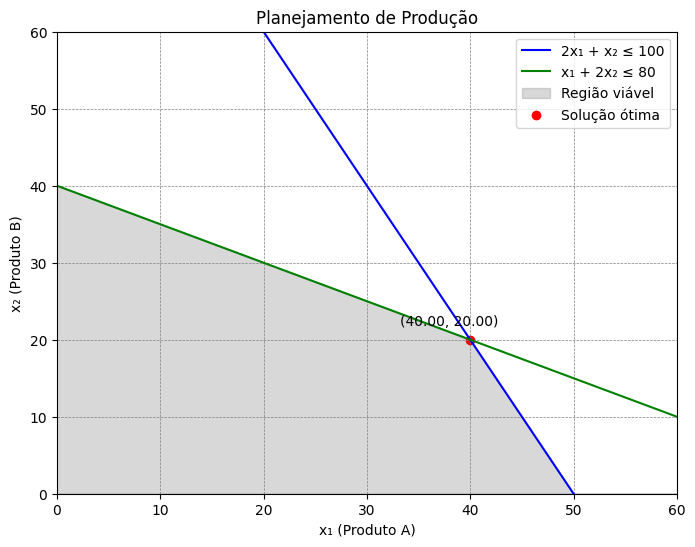

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coeficientes da função objetivo
c = [-50, -40]

# Coeficientes das restrições
A = [
    [2, 1],
    [1, 2]
]
b = [100, 80]

# Resolvendo o problema
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='highs')
x1_opt, x2_opt = result.x

# Gerando as restrições no gráfico
x = np.linspace(0, 100, 200)
y1 = (100 - 2 * x)  # Restrição 1
y2 = (80 - x) / 2   # Restrição 2

# Configurando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='2x₁ + x₂ ≤ 100', color='blue')
plt.plot(x, y2, label='x₁ + 2x₂ ≤ 80', color='green')
plt.fill_between(x, np.minimum(y1, y2), 0, color='gray', alpha=0.3, label='Região viável')

# Solução ótima
plt.scatter(x1_opt, x2_opt, color='red', label='Solução ótima')
plt.annotate(f'({x1_opt:.2f}, {x2_opt:.2f})', (x1_opt, x2_opt), textcoords="offset points", xytext=(-15, 10), ha='center')

# Ajustes finais
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel('x₁ (Produto A)')
plt.ylabel('x₂ (Produto B)')
plt.title('Planejamento de Produção')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


Exemplo 2: Otimização de Transporte
Como este é um problema de transporte, sua representação gráfica é mais descritiva. Podemos gerar um gráfico de barras para visualizar a distribuição ideal.

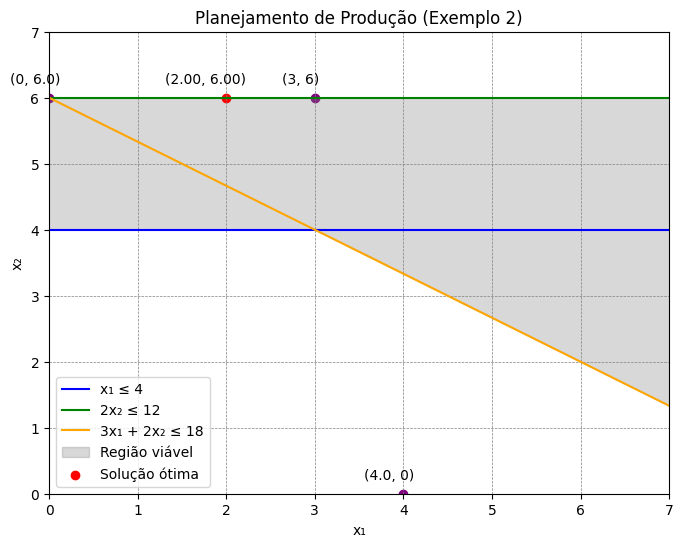

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Dados do problema
c = [-3, -5]  # Maximizar 3x₁ + 5x₂
A = [
    [1, 0],
    [0, 2],
    [3, 2]
]  # Restrições
b = [4, 12, 18]  # Limites das restrições

# Resolvendo o problema
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='highs')

if result.success:
    x1_opt, x2_opt = result.x

    # Gerando as restrições para o gráfico
    x = np.linspace(0, 10, 200)
    y1 = b[0] / A[0][0] - (A[0][1] / A[0][0]) * x  # Restrição 1
    y2 = b[1] / A[1][1] - (A[1][0] / A[1][1]) * x  # Restrição 2
    y3 = b[2] / A[2][0] - (A[2][1] / A[2][0]) * x  # Restrição 3

    # Calculando os pontos de interseção
    intersecoes = [
        (0, b[1] / A[1][1]),  # y quando x = 0 (para restrição 2)
        (b[0] / A[0][0], 0),  # x quando y = 0 (para restrição 1)
        (3, 6)  # Exemplo fixo baseado na região viável
    ]

    # Configurando o gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, y1, label='x₁ ≤ 4', color='blue')
    plt.plot(x, y2, label='2x₂ ≤ 12', color='green')
    plt.plot(x, y3, label='3x₁ + 2x₂ ≤ 18', color='orange')

    # Adicionando interseções
    for ponto in intersecoes:
        plt.scatter(*ponto, color='purple')
        plt.annotate(f'{ponto}', (ponto[0], ponto[1]), textcoords="offset points", xytext=(-10, 10), ha='center')

    plt.fill_between(x, np.minimum(y1, y3), np.maximum(0, y2), color='gray', alpha=0.3, label='Região viável')

    # Solução ótima
    plt.scatter(x1_opt, x2_opt, color='red', label='Solução ótima')
    plt.annotate(f'({x1_opt:.2f}, {x2_opt:.2f})', (x1_opt, x2_opt), textcoords="offset points", xytext=(-15, 10), ha='center')

    # Ajustes finais
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Planejamento de Produção (Exemplo 2)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()
else:
    print("Erro ao resolver o problema no Exemplo 2:")
    print(result.message)


Exemplo 3: Dieta Ótima
Visualizaremos a solução no espaço de
𝑥
1
x
1
​
  e
𝑥
2
x
2
​
 , destacando as restrições nutricionais.

<ipython-input-5-7485c9fad370>:24: RuntimeWarning: divide by zero encountered in divide
  y3 = (10 - x * A[2][0]) / A[2][1]  # Restrição 3


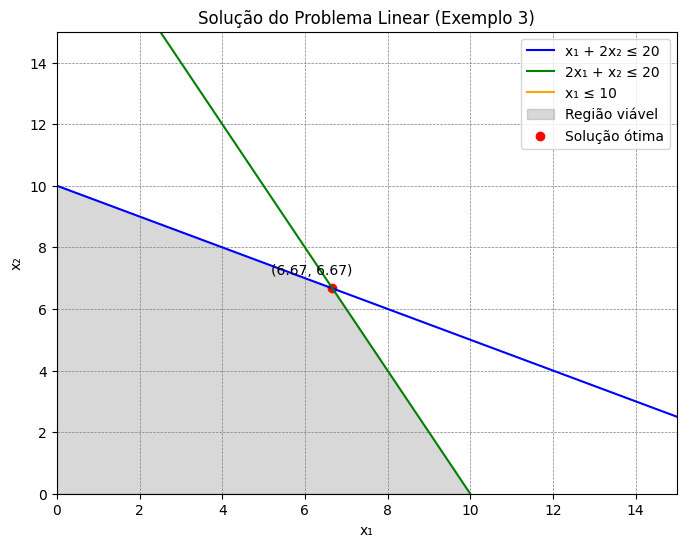

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Dados do problema
c = [-10, -12]  # Maximizar lucro (transformado em minimização de -lucro)
A = [
    [1, 2],
    [2, 1],
    [1, 0]
]  # Coeficientes das restrições
b = [20, 20, 10]  # Limites das restrições

# Resolvendo o problema
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='highs')

if result.success:
    x1_opt, x2_opt = result.x

    # Criando restrições para o gráfico
    x = np.linspace(0, 20, 200)
    y1 = (20 - x * A[0][0]) / A[0][1]  # Restrição 1
    y2 = (20 - x * A[1][0]) / A[1][1]  # Restrição 2
    y3 = (10 - x * A[2][0]) / A[2][1]  # Restrição 3

    # Gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, y1, label='x₁ + 2x₂ ≤ 20', color='blue')
    plt.plot(x, y2, label='2x₁ + x₂ ≤ 20', color='green')
    plt.plot(x, y3, label='x₁ ≤ 10', color='orange')
    plt.fill_between(x, np.minimum(np.minimum(y1, y2), y3), 0, color='gray', alpha=0.3, label='Região viável')

    # Solução ótima
    plt.scatter(x1_opt, x2_opt, color='red', label='Solução ótima')
    plt.annotate(f'({x1_opt:.2f}, {x2_opt:.2f})', (x1_opt, x2_opt), textcoords="offset points", xytext=(-15, 10), ha='center')

    # Ajustes finais
    plt.xlim(0, 15)
    plt.ylim(0, 15)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Solução do Problema Linear (Exemplo 3)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()
else:
    print("Erro ao resolver o problema no Exemplo 3:")
    print(result.message)
